<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-04-19 04:18:15--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  66.2MB/s    in 2.3s    

2025-04-19 04:18:17 (66.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.




--- Generating: Histogram of Yearly Compensation ---
Using 23435 valid compensation entries.
Visualizing distribution up to the 99th percentile: $393,751.06
Number of respondents shown in histogram: 23200


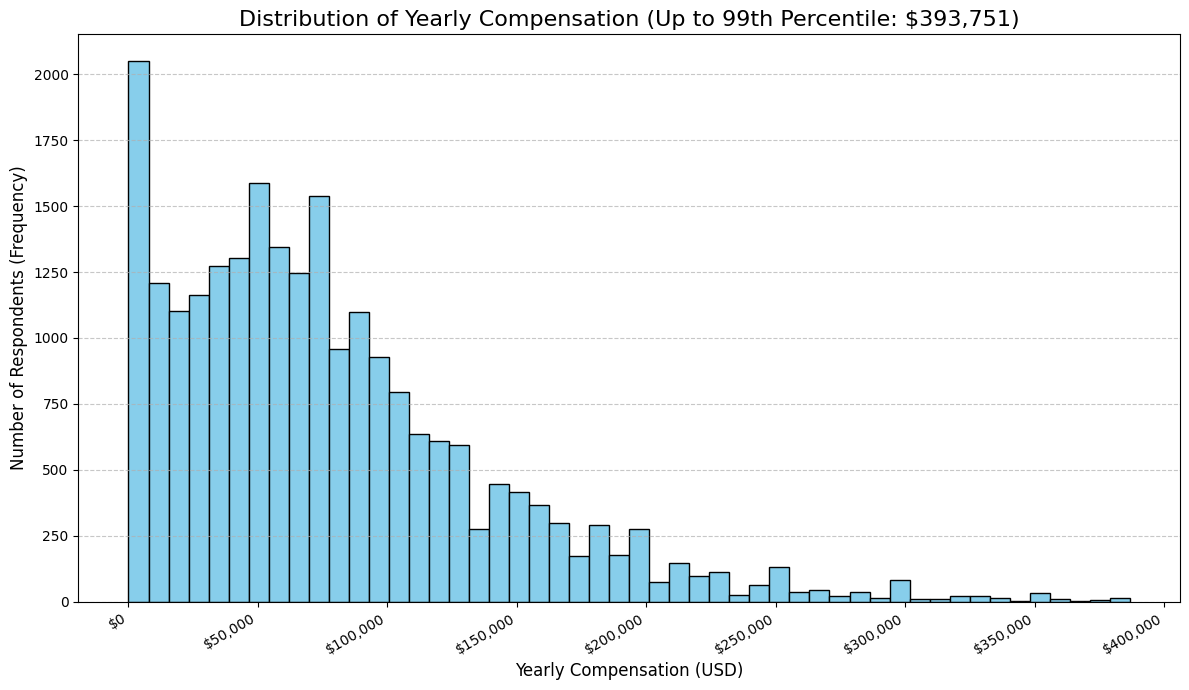

In [4]:
## Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Assuming 'df' is your loaded DataFrame from the previous steps

print("\n--- Generating: Histogram of Yearly Compensation ---")

# --- 1. Define Column Name ---
comp_col = 'ConvertedCompYearly'

# --- 2. Check if Required Column Exists ---
if comp_col in df.columns:

    # --- 3. Prepare Data ---
    # Select the column, ensure numeric, and drop NaNs
    data_comp = df[comp_col].copy()
    data_comp = pd.to_numeric(data_comp, errors='coerce')
    data_comp.dropna(inplace=True)

    print(f"Using {len(data_comp)} valid compensation entries.")

    # --- Address Skewness/Outliers for Visualization ---
    # Compensation data is often highly skewed. Let's cap the data for a more
    # informative histogram of the main distribution. We'll use the 99th percentile.
    cap_value = data_comp.quantile(0.99)
    data_comp_capped = data_comp[data_comp <= cap_value]

    print(f"Visualizing distribution up to the 99th percentile: ${cap_value:,.2f}")
    print(f"Number of respondents shown in histogram: {len(data_comp_capped)}")


    # --- 4. Check if Data is Available for Plotting ---
    if data_comp_capped.empty:
        print("Error: No valid compensation data remaining after filtering. Cannot generate plot.")
    else:
        # --- 5. Create the Histogram ---
        plt.figure(figsize=(12, 7))

        # Create the histogram
        plt.hist(data_comp_capped, bins=50, color='skyblue', edgecolor='black') # Adjust bins as needed

        # --- 6. Customize the Plot ---
        plt.title(f'Distribution of Yearly Compensation (Up to 99th Percentile: ${cap_value:,.0f})', fontsize=16)
        plt.xlabel('Yearly Compensation (USD)', fontsize=12)
        plt.ylabel('Number of Respondents (Frequency)', fontsize=12)

        # --- Format x-axis using FuncFormatter (optional but recommended) ---
        ax = plt.gca()
        def currency_formatter_hist(x, pos):
            # Simple formatter for histogram axis
            return '${:,.0f}'.format(x)
        formatter = mticker.FuncFormatter(currency_formatter_hist)
        ax.xaxis.set_major_formatter(formatter)
        plt.xticks(rotation=30, ha='right') # Rotate labels slightly if needed
        # --- End of Formatting ---

        plt.grid(axis='y', linestyle='--', alpha=0.7) # Grid lines on y-axis
        plt.tight_layout()
        plt.show()

else:
    print(f"Histogram skipped: Required column '{comp_col}' not found.")

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.




--- Generating: Box Plot of Respondent Age (Numerical Approximation) ---
Using 65115 respondents with mappable age groups.
Age groups mapped to numerical values (e.g., midpoints):
{'Under 18 years old': 17, '18-24 years old': 21.0, '25-34 years old': 29.5, '35-44 years old': 39.5, '45-54 years old': 49.5, '55-64 years old': 59.5, '65 years or older': 67}


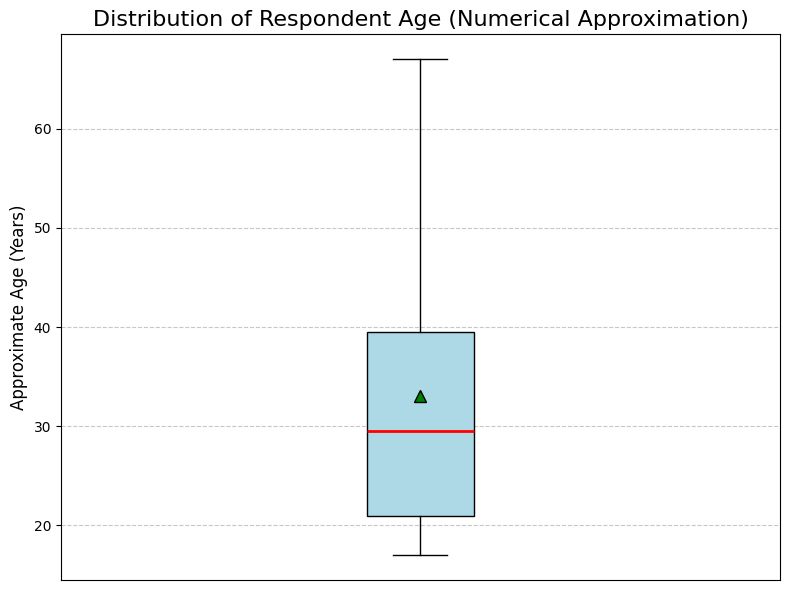

In [5]:
## Write your code here
print("\n--- Generating: Box Plot of Respondent Age (Numerical Approximation) ---")

# --- 1. Define Column Name ---
age_col = 'Age'

# --- 2. Check if Required Column Exists ---
if age_col in df.columns:

    # --- 3. Prepare Data: Convert Categorical Age to Numerical ---
    # Select the column and drop initial NaNs to simplify mapping
    age_data = df[age_col].dropna().copy()

    # Define mapping from age group strings to numerical midpoints (or approximations)
    age_mapping = {
        'Under 18 years old': 17,   # Approximation for the lower end
        '18-24 years old': (18 + 24) / 2,  # 21.0
        '25-34 years old': (25 + 34) / 2,  # 29.5
        '35-44 years old': (35 + 44) / 2,  # 39.5
        '45-54 years old': (45 + 54) / 2,  # 49.5
        '55-64 years old': (55 + 64) / 2,  # 59.5
        '65 years or older': 67       # Approximation for the upper end
    }

    # Apply the mapping
    numerical_age = age_data.map(age_mapping)

    # Drop any rows where mapping failed (i.e., resulted in NaN, though we dropped initial NaNs)
    numerical_age.dropna(inplace=True)

    print(f"Using {len(numerical_age)} respondents with mappable age groups.")
    print(f"Age groups mapped to numerical values (e.g., midpoints):\n{age_mapping}")

    # --- 4. Check if Data is Available for Plotting ---
    if numerical_age.empty:
        print("Error: No valid numerical age data remaining after mapping. Cannot generate plot.")
    else:
        # --- 5. Create the Box Plot ---
        plt.figure(figsize=(8, 6)) # Adjust size as needed

        # Create the box plot (default is vertical)
        # `patch_artist=True` fills the box with color
        plt.boxplot(numerical_age, patch_artist=True, showmeans=True,
                    boxprops=dict(facecolor='lightblue'),
                    medianprops=dict(color='red', linewidth=2),
                    meanprops=dict(marker='^', markeredgecolor='black', markerfacecolor='green', markersize=8))


        # --- 6. Customize the Plot ---
        plt.title('Distribution of Respondent Age (Numerical Approximation)', fontsize=16)
        plt.ylabel('Approximate Age (Years)', fontsize=12)
        # Hide x-axis ticks and labels as there's only one category
        plt.xticks([])
        plt.xlabel('') # Remove x-axis label text

        plt.grid(axis='y', linestyle='--', alpha=0.7) # Grid lines on y-axis
        plt.tight_layout()
        plt.show()

else:
    print(f"Box plot skipped: Required column '{age_col}' not found.")

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.




--- Generating: Scatter Plot of Compensation vs. Age ---
Using 23426 respondents with valid numerical Age and Compensation.
Plotting compensation up to the 99th percentile: $394,717.75
Number of points in scatter plot: 23191


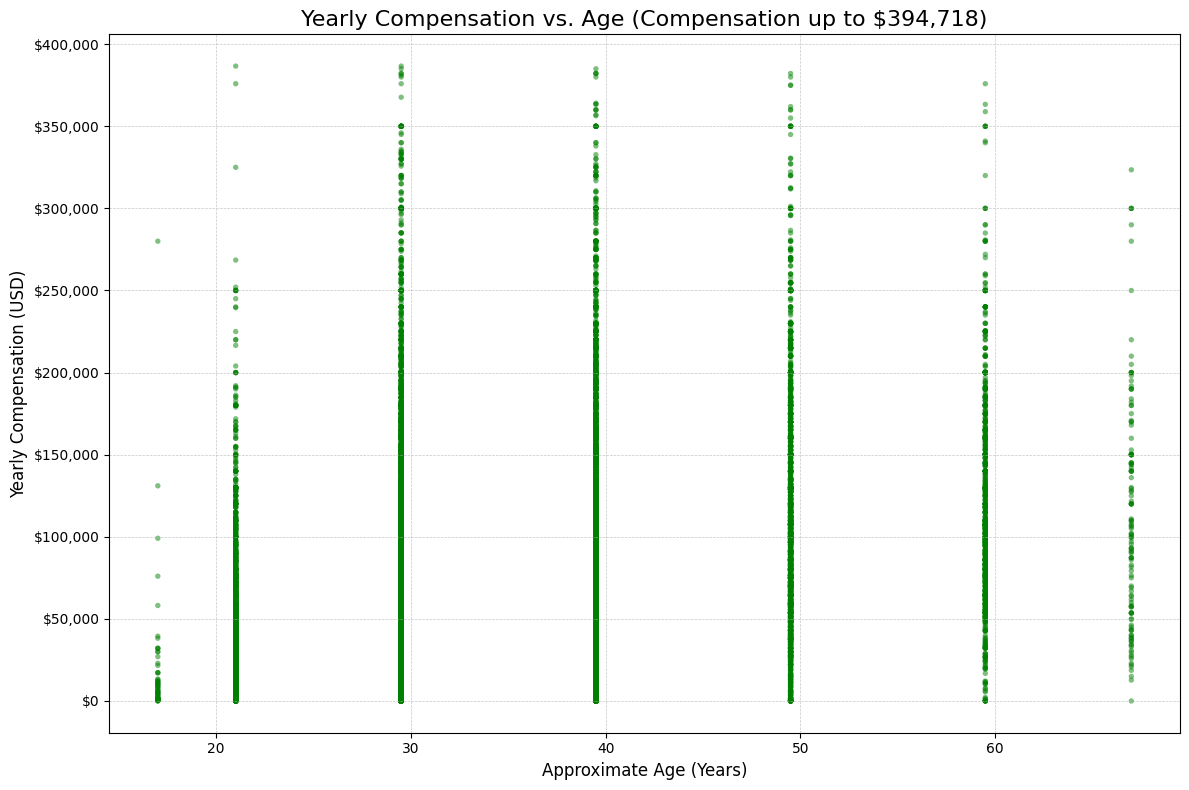

In [8]:
## Write your code here

print("\n--- Generating: Scatter Plot of Compensation vs. Age ---")

# --- 1. Define Column Names ---
age_col = 'Age'
comp_col = 'ConvertedCompYearly'
num_age_col = 'Age_numeric' # Name for the new numerical age column

# --- 2. Check if Required Columns Exist ---
if age_col in df.columns and comp_col in df.columns:

    # --- 3. Prepare Data ---
    # Select relevant columns and copy
    data_scatter = df[[age_col, comp_col]].copy()

    # --- Convert Age to Numerical (reuse mapping logic) ---
    age_mapping = {
        'Under 18 years old': 17,
        '18-24 years old': 21.0,
        '25-34 years old': 29.5,
        '35-44 years old': 39.5,
        '45-54 years old': 49.5,
        '55-64 years old': 59.5,
        '65 years or older': 67
    }
    data_scatter[num_age_col] = data_scatter[age_col].map(age_mapping)

    # --- Convert Compensation to Numerical ---
    data_scatter[comp_col] = pd.to_numeric(data_scatter[comp_col], errors='coerce')

    # --- Drop rows with missing values in EITHER numerical age OR compensation ---
    data_scatter.dropna(subset=[num_age_col, comp_col], inplace=True)

    print(f"Using {len(data_scatter)} respondents with valid numerical Age and Compensation.")

    # --- Address Compensation Outliers for Visualization ---
    cap_value = data_scatter[comp_col].quantile(0.99)
    data_scatter_filtered = data_scatter[data_scatter[comp_col] <= cap_value].copy() # Use copy to avoid SettingWithCopyWarning if modifying later

    print(f"Plotting compensation up to the 99th percentile: ${cap_value:,.2f}")
    print(f"Number of points in scatter plot: {len(data_scatter_filtered)}")

    # --- 4. Check if Data is Available for Plotting ---
    if data_scatter_filtered.empty:
        print("Error: No valid data remaining after filtering for scatter plot. Cannot generate plot.")
    else:
        # --- 5. Create the Scatter Plot ---
        plt.figure(figsize=(12, 8))

        # Create the scatter plot
        plt.scatter(data_scatter_filtered[num_age_col],  # x-axis: numerical age
                    data_scatter_filtered[comp_col],     # y-axis: capped compensation
                    alpha=0.5,                           # Transparency to handle overlap
                    s=15,                                # Adjust marker size if needed
                    color='green',                       # Choose color
                    edgecolors='none')                   # Remove marker edges for dense plots

        # --- 6. Customize the Plot ---
        plt.title(f'Yearly Compensation vs. Age (Compensation up to ${cap_value:,.0f})', fontsize=16)
        plt.xlabel('Approximate Age (Years)', fontsize=12)
        plt.ylabel('Yearly Compensation (USD)', fontsize=12)

        # --- Format y-axis using FuncFormatter ---
        ax = plt.gca()
        def currency_formatter(x, pos):
             if pd.isna(x): return ''
             return '${:,.0f}'.format(x)
        formatter = mticker.FuncFormatter(currency_formatter)
        ax.yaxis.set_major_formatter(formatter)
        # --- End of Formatting ---

        plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
        plt.tight_layout()
        plt.show()

else:
    print(f"Scatter plot skipped: Required columns '{age_col}' or '{comp_col}' not found.")

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.



--- Generating: Bubble Plot of Compensation vs. Satisfaction (Size by Age) ---
Using 16177 respondents with valid numerical Age, Compensation, and Satisfaction.
Plotting compensation up to the 99th percentile: $369,433.76
Using scale factor 4 for age bubble size.
Number of points in bubble plot: 16015


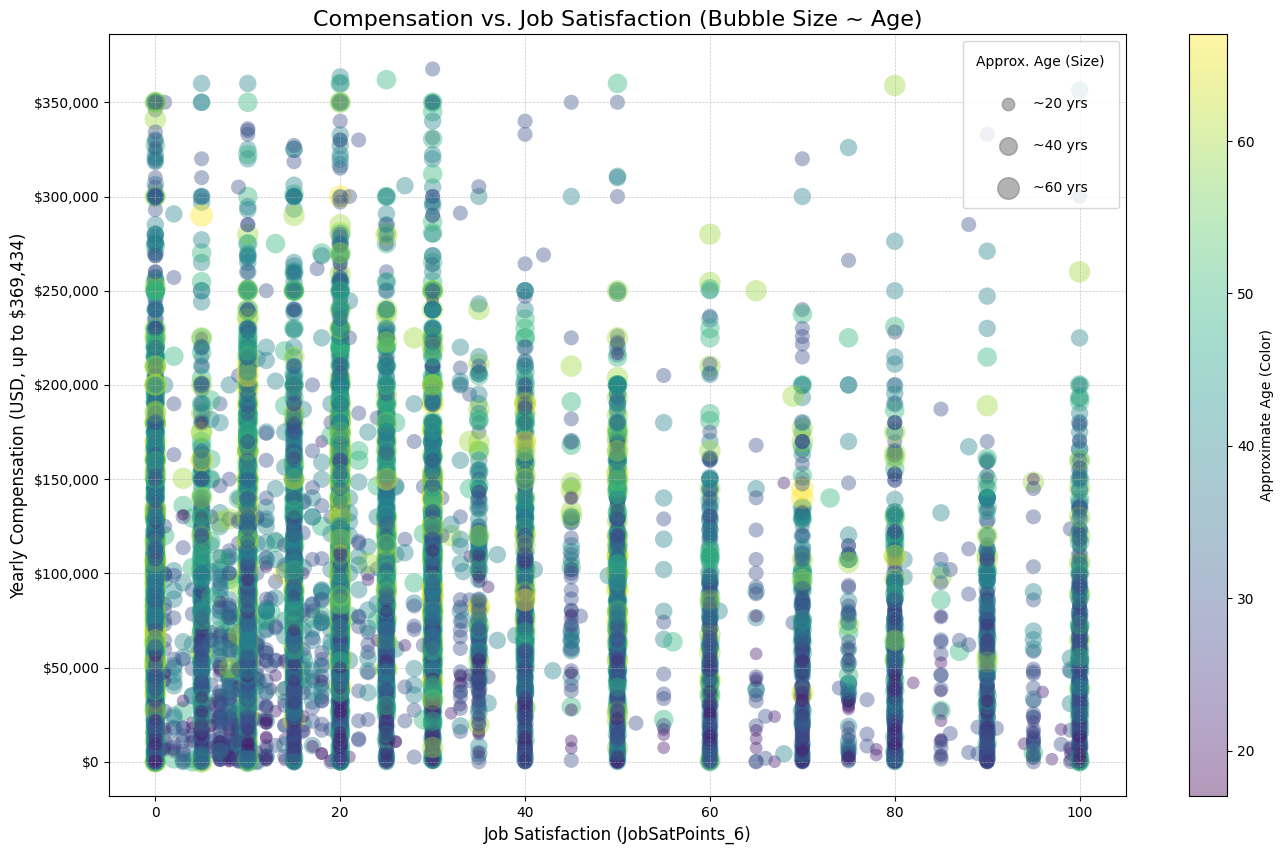

In [10]:
## Write your code here
print("\n--- Generating: Bubble Plot of Compensation vs. Satisfaction (Size by Age) ---")

# --- 1. Define Column Names ---
age_col = 'Age'
comp_col = 'ConvertedCompYearly'
sat_col = 'JobSatPoints_6'
num_age_col = 'Age_numeric' # Name for the new numerical age column

# --- 2. Check if Required Columns Exist ---
if age_col in df.columns and comp_col in df.columns and sat_col in df.columns:

    # --- 3. Prepare Data ---
    # Select relevant columns and copy
    data_bubble = df[[age_col, comp_col, sat_col]].copy()

    # --- Convert Age to Numerical (reuse mapping logic) ---
    age_mapping = {
        'Under 18 years old': 17,
        '18-24 years old': 21.0,
        '25-34 years old': 29.5,
        '35-44 years old': 39.5,
        '45-54 years old': 49.5,
        '55-64 years old': 59.5,
        '65 years or older': 67
    }
    data_bubble[num_age_col] = data_bubble[age_col].map(age_mapping)

    # --- Convert Compensation and Satisfaction to Numerical ---
    data_bubble[comp_col] = pd.to_numeric(data_bubble[comp_col], errors='coerce')
    data_bubble[sat_col] = pd.to_numeric(data_bubble[sat_col], errors='coerce')

    # --- Drop rows with missing values in ANY of the three key columns ---
    data_bubble.dropna(subset=[num_age_col, comp_col, sat_col], inplace=True)

    print(f"Using {len(data_bubble)} respondents with valid numerical Age, Compensation, and Satisfaction.")

    # --- Address Compensation Outliers for Visualization ---
    cap_value = data_bubble[comp_col].quantile(0.99)
    data_bubble_filtered = data_bubble[data_bubble[comp_col] <= cap_value].copy() # Use copy

    print(f"Plotting compensation up to the 99th percentile: ${cap_value:,.2f}")

    # --- Scale Age for Bubble Size ---
    # Multiply age by a factor to make size differences more apparent
    # Adjust this scale factor as needed based on visual output
    age_scale_factor = 4
    data_bubble_filtered['Scaled_Age_Size'] = data_bubble_filtered[num_age_col] * age_scale_factor
    print(f"Using scale factor {age_scale_factor} for age bubble size.")

    print(f"Number of points in bubble plot: {len(data_bubble_filtered)}")


    # --- 4. Check if Data is Available for Plotting ---
    if data_bubble_filtered.empty:
        print("Error: No valid data remaining after filtering for bubble plot. Cannot generate plot.")
    else:
        # --- 5. Create the Bubble Plot ---
        plt.figure(figsize=(14, 9))

        # Create the scatter plot with size determined by scaled age
        scatter = plt.scatter(data_bubble_filtered[sat_col],        # x-axis: satisfaction
                              data_bubble_filtered[comp_col],       # y-axis: capped compensation
                              s=data_bubble_filtered['Scaled_Age_Size'], # size: scaled age
                              alpha=0.4,                             # Transparency
                              c=data_bubble_filtered[num_age_col],   # Optional: Color by age too
                              cmap='viridis',                        # Colormap if using 'c'
                              edgecolors='none')

        # --- 6. Customize the Plot ---
        plt.title(f'Compensation vs. Job Satisfaction (Bubble Size ~ Age)', fontsize=16)
        plt.xlabel(f'Job Satisfaction ({sat_col})', fontsize=12)
        plt.ylabel(f'Yearly Compensation (USD, up to ${cap_value:,.0f})', fontsize=12)

        # --- Format y-axis using FuncFormatter ---
        ax = plt.gca()
        def currency_formatter(x, pos):
             if pd.isna(x): return ''
             return '${:,.0f}'.format(x)
        formatter = mticker.FuncFormatter(currency_formatter)
        ax.yaxis.set_major_formatter(formatter)
        # --- End of Formatting ---

        # --- Create a Legend for Bubble Sizes ---
        # Create some proxy artists (points) for the legend
        # Choose representative ages and calculate their scaled sizes
        legend_ages = [20, 40, 60] # Example ages
        legend_handles = []
        for age in legend_ages:
            # Find the closest numerical age used in mapping (approximate)
            # Or directly use the mapped values if preferred e.g. 21.0, 39.5, 59.5
            approx_scaled_size = age * age_scale_factor
            legend_handles.append(plt.scatter([], [], s=approx_scaled_size, # Empty data, just need size/label
                                             c='gray', alpha=0.6, # Use a neutral color for legend
                                             label=f'~{age} yrs'))

        # Add the legend to the plot
        plt.legend(handles=legend_handles,
                   title="Approx. Age (Size)",
                   labelspacing=2, # Increase spacing between legend items
                   borderpad=1,    # Padding inside legend box
                   loc='upper right', # Adjust location as needed
                   scatterpoints=1) # Ensure one marker per legend item


        # --- Optional: Add a Colorbar if using 'c' for color ---
        cbar = plt.colorbar(scatter, label='Approximate Age (Color)')

        plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
        plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust rect slightly if title overlaps legend/colorbar
        plt.show()

else:
    print(f"Bubble plot skipped: Required columns '{age_col}', '{comp_col}', or '{sat_col}' not found.")

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.




--- Generating: Horizontal Bar Chart of Main Branch Distribution ---
Showing all 5 Main Branch categories.

Respondent Counts by Main Branch (Top 5):
MainBranch
I am a developer by profession                                                           50207
I am not primarily a developer, but I write code sometimes as part of my work/studies     6511
I am learning to code                                                                     3875
I code primarily as a hobby                                                               3334
I used to be a developer by profession, but no longer am                                  1510
Name: count, dtype: int64


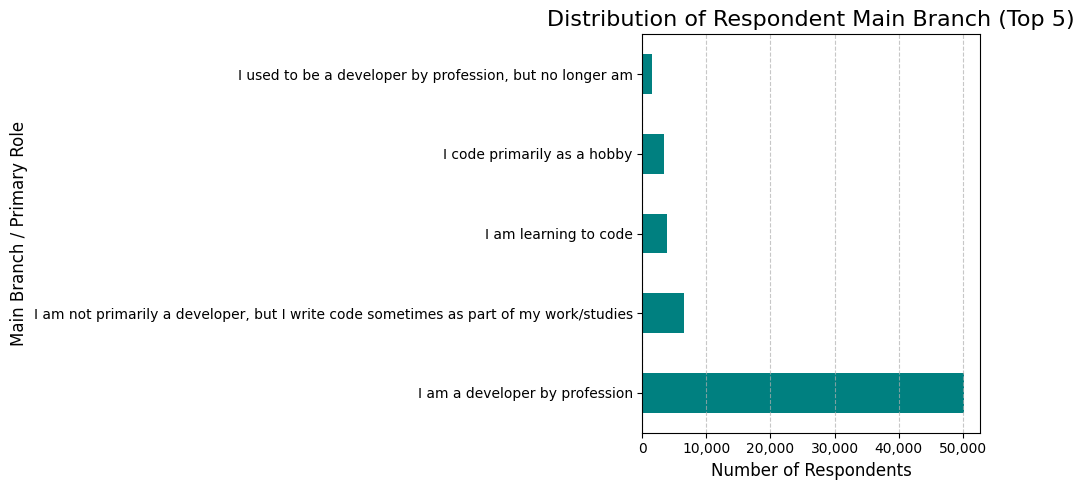

In [9]:
## Write your code here
print("\n--- Generating: Horizontal Bar Chart of Main Branch Distribution ---")

# --- 1. Define Column Name ---
branch_col = 'MainBranch'

# --- 2. Check if Required Column Exists ---
if branch_col in df.columns:

    # --- 3. Prepare Data ---
    # Select the column, drop NaNs, and get value counts
    main_branch_counts = df[branch_col].dropna().value_counts()

    # Optional: Limit to top N categories if there are too many
    top_n = 10 # Adjust this number as needed, or comment out the next line to show all
    if len(main_branch_counts) > top_n:
         print(f"Showing Top {top_n} of {len(main_branch_counts)} Main Branch categories.")
         main_branch_counts = main_branch_counts.head(top_n)
    else:
        print(f"Showing all {len(main_branch_counts)} Main Branch categories.")

    print(f"\nRespondent Counts by Main Branch (Top {len(main_branch_counts)}):")
    print(main_branch_counts)

    # --- 4. Check if Data is Available for Plotting ---
    if main_branch_counts.empty:
        print("Error: No valid data found for Main Branch. Cannot generate plot.")
    else:
        # --- 5. Create the Horizontal Bar Chart ---
        # Determine figure height based on number of categories shown
        fig_height = max(5, len(main_branch_counts) * 0.5) # Adjust multiplier as needed
        plt.figure(figsize=(10, fig_height))

        # Create the horizontal bar chart using pandas plotting
        # Note: .plot(kind='barh') plots index on y-axis, values on x-axis
        # It automatically sorts with highest count at the top.
        main_branch_counts.plot(kind='barh', color='teal') # edgecolor can be added if desired

        # --- 6. Customize the Plot ---
        plt.title(f'Distribution of Respondent Main Branch (Top {len(main_branch_counts)})', fontsize=16)
        plt.xlabel('Number of Respondents', fontsize=12)
        plt.ylabel('Main Branch / Primary Role', fontsize=12)

        # Invert y-axis because pandas plots highest count at top (index 0),
        # which is usually desired for horizontal bars. If using plt.barh directly,
        # you might need this, but with pandas plot, it's often correct by default.
        # Test without it first: plt.gca().invert_yaxis()

        # Add grid lines on the x-axis (count axis)
        plt.grid(axis='x', linestyle='--', alpha=0.7)

        # Optional: Format x-axis with thousands separators if counts are large
        ax = plt.gca()
        ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))


        plt.tight_layout()
        plt.show()

else:
    print(f"Bar chart skipped: Required column '{branch_col}' not found.")

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.




--- Generating: Vertical Bar Chart of Top 5 Desired Programming Languages ---
Top 5 most desired programming languages:
LanguageWantToWorkWith
Python        25047
JavaScript    23774
SQL           22400
HTML/CSS      20721
TypeScript    20239
Name: count, dtype: int64


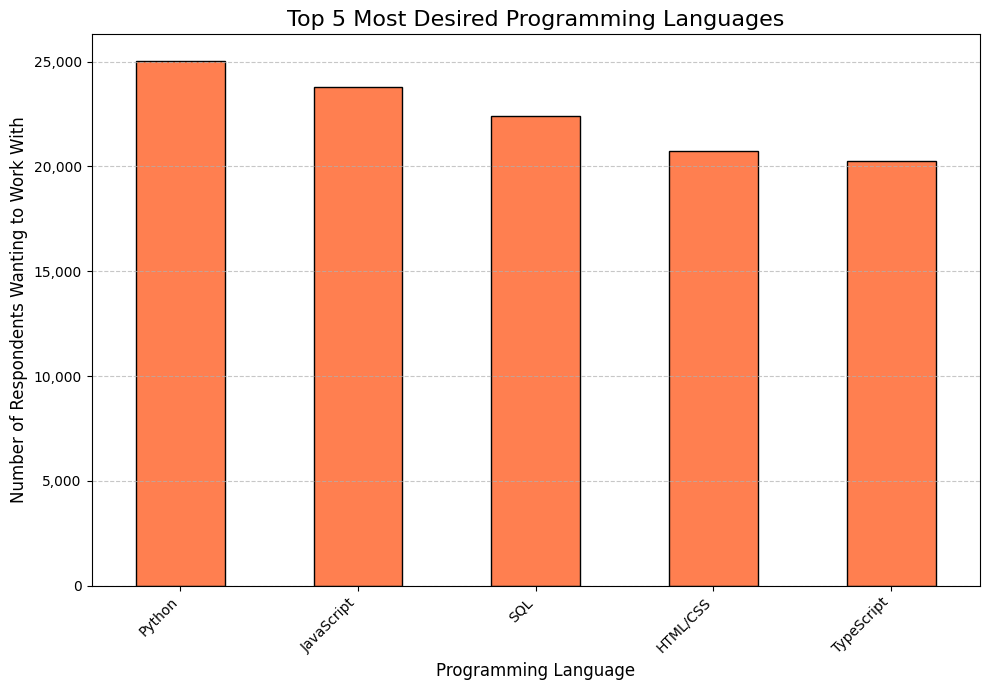

In [14]:
## Write your code here
print("\n--- Generating: Vertical Bar Chart of Top 5 Desired Programming Languages ---")

# --- 1. Define Column Name ---
lang_col = 'LanguageWantToWorkWith'

# --- 2. Check if Required Column Exists ---
if lang_col in df.columns:

    # --- 3. Prepare Data ---
    # Select the column, drop NaNs
    data_lang = df[lang_col].dropna().copy()

    # Split the strings by semicolon, explode into individual language entries
    data_lang_split = data_lang.str.split(';')
    data_lang_exploded = data_lang_split.explode()

    # Clean up: strip whitespace from each language name
    data_lang_cleaned = data_lang_exploded.str.strip()

    # Remove any empty strings that might result from splitting (e.g., if data has ';;')
    data_lang_cleaned = data_lang_cleaned[data_lang_cleaned != '']

    # Get value counts and select the top 5
    lang_counts = data_lang_cleaned.value_counts()
    top_5_langs = lang_counts.head(5)

    print(f"Top 5 most desired programming languages:")
    print(top_5_langs)

    # --- 4. Check if Data is Available for Plotting ---
    if top_5_langs.empty:
        print("Error: No language data found or no languages counted. Cannot generate plot.")
    else:
        # --- 5. Create the Vertical Bar Chart ---
        plt.figure(figsize=(10, 7)) # Adjust figure size as needed

        # Use pandas plotting directly on the Series
        top_5_langs.plot(kind='bar', color='coral', edgecolor='black')

        # --- 6. Customize the Plot ---
        plt.title('Top 5 Most Desired Programming Languages', fontsize=16)
        plt.xlabel('Programming Language', fontsize=12)
        plt.ylabel('Number of Respondents Wanting to Work With', fontsize=12)

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45, ha='right')

        # Add grid lines on the y-axis (count axis)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Format y-axis with thousands separators
        ax = plt.gca()
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))

        plt.tight_layout()
        plt.show()

else:
    print(f"Bar chart skipped: Required column '{lang_col}' not found.")

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.



--- Generating: Stacked Bar - Median JobSatPoints_6 & 7 by Age ---
Using 29373 rows with valid Age and both JobSatPoints.

Median Job Satisfaction Scores by Age Group:
                    JobSatPoints_6  JobSatPoints_7
Age                                               
Under 18 years old             1.5             5.0
18-24 years old               15.0            20.0
25-34 years old               20.0            15.0
35-44 years old               20.0            15.0
45-54 years old               20.0            15.0
55-64 years old               20.0            20.0
65 years or older             20.0            15.0


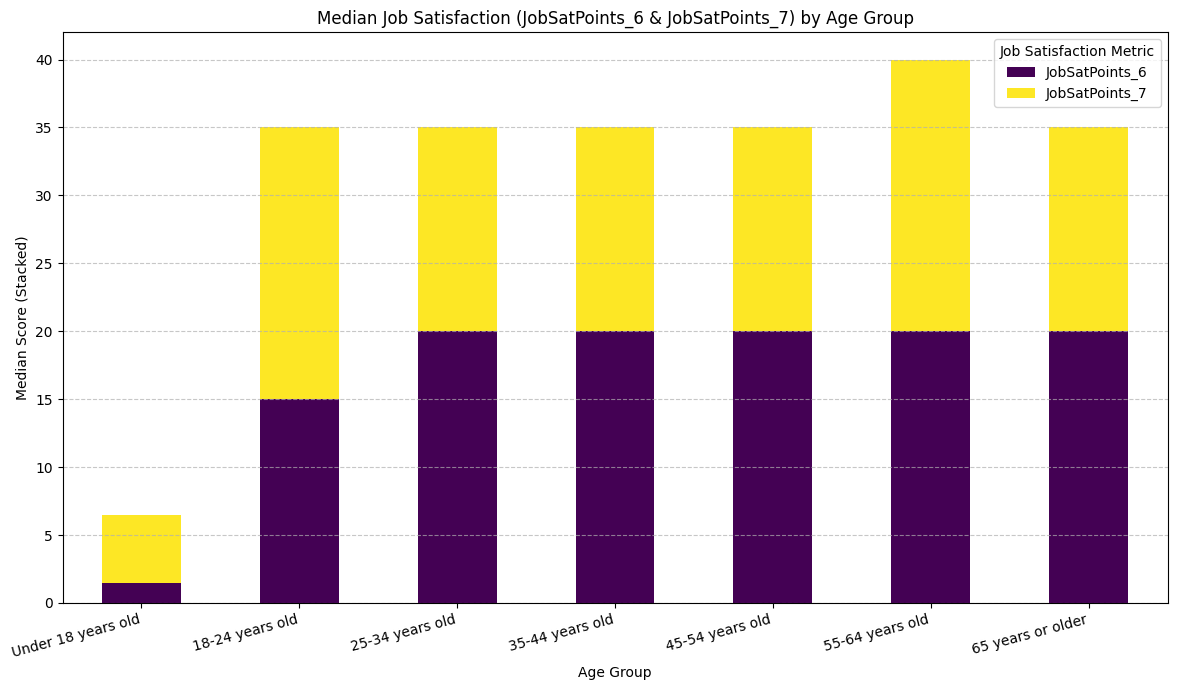

In [15]:
## Write your code here
age_order = [
     'Under 18 years old', '18-24 years old', '25-34 years old',
     '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']
print("\n--- Generating: Stacked Bar - Median JobSatPoints_6 & 7 by Age ---")
# --- 1. Define Column Names ---
age_col = 'Age'
sat_col_6 = 'JobSatPoints_6'
sat_col_7 = 'JobSatPoints_7'

# --- 2. Check if Required Columns Exist ---
if age_col in df.columns and sat_col_6 in df.columns and sat_col_7 in df.columns:

    # --- 3. Prepare Data ---
    data_sat_age = df[[age_col, sat_col_6, sat_col_7]].copy()

    # Ensure numeric types
    data_sat_age[sat_col_6] = pd.to_numeric(data_sat_age[sat_col_6], errors='coerce')
    data_sat_age[sat_col_7] = pd.to_numeric(data_sat_age[sat_col_7], errors='coerce')

    # Clean Age and filter valid groups, make categorical
    data_sat_age = data_sat_age[data_sat_age[age_col].isin(age_order)]
    data_sat_age[age_col] = pd.Categorical(data_sat_age[age_col],
                                           categories=age_order, ordered=True)

    # Drop rows missing any of the relevant data points
    data_sat_age.dropna(subset=[age_col, sat_col_6, sat_col_7], inplace=True)
    print(f"Using {len(data_sat_age)} rows with valid Age and both JobSatPoints.")

    # --- 4. Calculate Medians for each age group ---
    # Use observed=False to ensure all age categories appear
    median_scores = data_sat_age.groupby(age_col, observed=False)[[sat_col_6, sat_col_7]].median()

    # Ensure the index follows the desired age order (redundant but safe)
    median_scores = median_scores.reindex(age_order)

    print("\nMedian Job Satisfaction Scores by Age Group:")
    print(median_scores)

    # --- 5. Check if data remains after grouping ---
    if median_scores.isnull().all().all():
        print("Error: No valid median data calculated. Cannot generate plot.")
    elif median_scores.dropna(how='all').empty:
        print("Warning: Some age groups might have missing median values.")
    # Proceed to plot even if some NaNs exist

    # --- 6. Create the Stacked Bar Chart using Pandas plotting ---
    if not median_scores.isnull().all().all():
        ax = median_scores.plot(kind='bar', stacked=True, figsize=(12, 7),
                                colormap='viridis') # Choose a colormap

        # --- 7. Customize the Plot ---
        plt.title(f'Median Job Satisfaction ({sat_col_6} & {sat_col_7}) by Age Group')
        plt.xlabel('Age Group')
        plt.ylabel('Median Score (Stacked)') # Clarify that y-axis represents stacked medians
        plt.xticks(rotation=15, ha='right')
        plt.legend(title='Job Satisfaction Metric')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        # Error message already printed
        pass

else:
    print(f"Stacked chart skipped: Required columns '{age_col}', '{sat_col_6}', or '{sat_col_7}' not found.")

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.




--- Generating: Bar Chart of Most Commonly Used Databases ---
Top 10 most commonly used databases:
DatabaseHaveWorkedWith
PostgreSQL              25536
MySQL                   21099
SQLite                  17365
Microsoft SQL Server    13275
MongoDB                 13007
Redis                   10463
MariaDB                  8991
Elasticsearch            6533
Oracle                   5273
Dynamodb                 4138
Name: count, dtype: int64


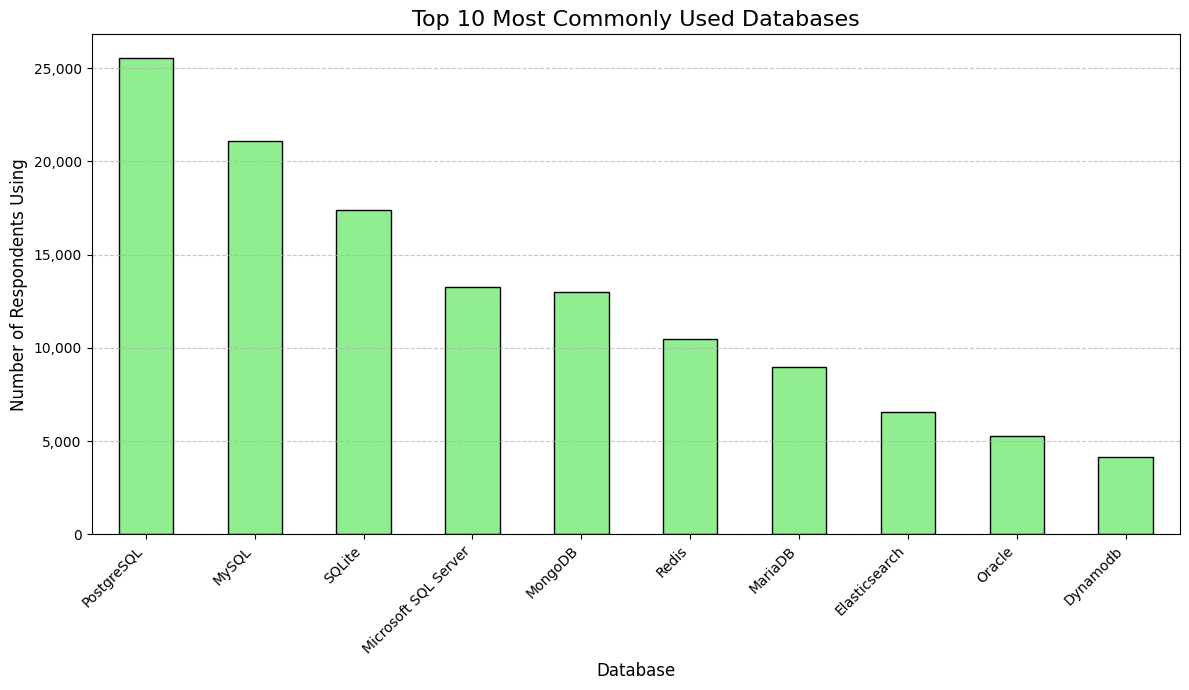

In [16]:
## Write your code here
print("\n--- Generating: Bar Chart of Most Commonly Used Databases ---")

# --- 1. Define Column Name ---
db_col = 'DatabaseHaveWorkedWith' # The column listing databases respondents have used

# --- 2. Check if Required Column Exists ---
if db_col in df.columns:

    # --- 3. Prepare Data ---
    # Select the column, drop NaNs
    data_db = df[db_col].dropna().copy()

    # Split the strings by semicolon, explode into individual database entries
    data_db_split = data_db.str.split(';')
    data_db_exploded = data_db_split.explode()

    # Clean up: strip whitespace from each database name
    data_db_cleaned = data_db_exploded.str.strip()

    # Remove any empty strings that might result from splitting
    data_db_cleaned = data_db_cleaned[data_db_cleaned != '']

    # Get value counts - this gives us the popularity
    db_counts = data_db_cleaned.value_counts()

    # Select the top N databases (e.g., top 10)
    top_n = 10
    top_databases = db_counts.head(top_n)

    print(f"Top {top_n} most commonly used databases:")
    print(top_databases)

    # --- 4. Check if Data is Available for Plotting ---
    if top_databases.empty:
        print("Error: No database usage data found or no databases counted. Cannot generate plot.")
    else:
        # --- 5. Create the Vertical Bar Chart ---
        plt.figure(figsize=(12, 7)) # Adjust figure size as needed

        # Use pandas plotting directly on the Series
        top_databases.plot(kind='bar', color='lightgreen', edgecolor='black')

        # --- 6. Customize the Plot ---
        plt.title(f'Top {top_n} Most Commonly Used Databases', fontsize=16)
        plt.xlabel('Database', fontsize=12)
        plt.ylabel('Number of Respondents Using', fontsize=12)

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45, ha='right')

        # Add grid lines on the y-axis (count axis)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Format y-axis with thousands separators
        ax = plt.gca()
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))

        plt.tight_layout()
        plt.show()

else:
    print(f"Bar chart skipped: Required column '{db_col}' not found.")

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



In [ ]:
## Write your code here

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



In [ ]:
## Write your code here

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
